In [22]:

import networkx as nx
import matplotlib.pyplot as plt
import collections
import numpy as np
def createGraph(edgelist, vertices, subgraph, directed):
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    if edgelist is not None:
        G.add_edges_from(edgelist)
        print(G.number_of_edges())
    if vertices is not None:
        G=nx.path_graph(len(edgelist))
        G=nx.relabel_nodes(G,vertices)
        print(G.edges())
    if subgraph is not None:
        G = G.subgraph(subgraph)
    nx.draw(G, with_labels=True)
    if directed:
        draw_in_degree_distribution(G)
        draw_out_degree_distribution(G)
    calc_BC(G, "centrality_distribution")
    #localSummary(G, subgraph)
    #globalSummary(G)
def draw_in_degree_distribution(G):
    degree_sequence = sorted([G.in_degree(i) for i in G.nodes()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    plot(degreeCount, "in_degree_plot", "in")
def draw_out_degree_distribution(G):
    degree_sequence = sorted([G.out_degree(i) for i in G.nodes()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    plot(degreeCount, "out_degree_plot", "out")

def plot(degreeCount, title, d_type,):
    deg, cnt = zip(*degreeCount.items())
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color="b")
    plt.title(title)
    plt.ylabel("Count")
    plt.xlabel(d_type + "_degrees")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)
def calc_BC(G, title):
    bc = nx.betweenness_centrality(G, normalized=False)
    bc = np.asarray(list(bc.values()))
    num_nodes = len(G.nodes())
    nodes_axis = range(1, num_nodes + 1)
    fig, ax = plt.subplots()
    plt.plot(nodes_axis, bc)
    plt.title(title, fontsize=18)
    plt.xlabel('Node Indices', fontsize=16)
    plt.ylabel('BC', fontsize=16)
    plt.show()


10


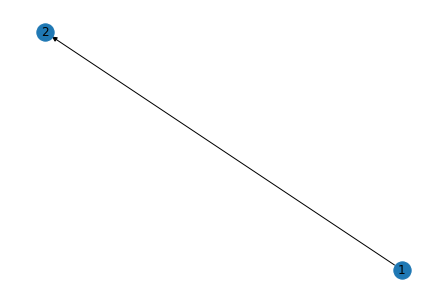

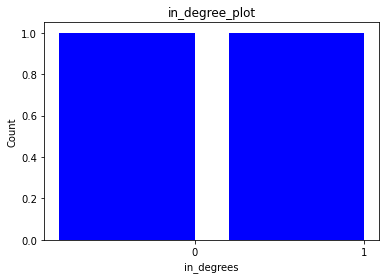

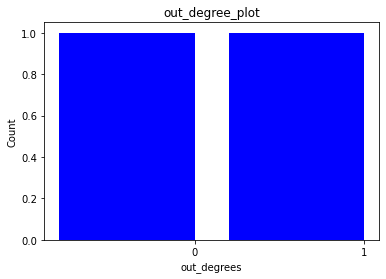

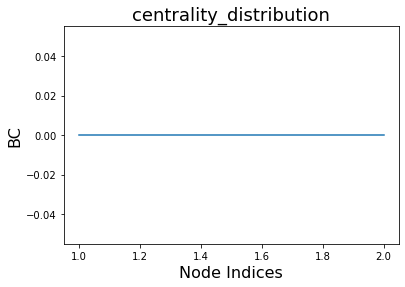

In [16]:
edgelist = [(1,2),(2,3),(3,2),(3,4),(3,5),(4,5),(4,6),(5,6),(6,4),(4,2)]
subgraph = [1,2]
createGraph(edgelist, None, subgraph, True)

In [38]:

# edgelist = [(1,2),(2,3),(3,2),(3,4),(3,5),(4,5),(4,6),(5,6),(6,4),(4,2)]
G1 = nx.read_edgelist('facebook/107.edges')
# G1 = nx.Graph()
# G1.add_edges_from(edgelist)
centrality = nx.eigenvector_centrality(G1)
EC = [c for v, c in centrality.items() if v in subgraph]
centrality = nx.betweenness_centrality(G1)
BC = [c for v, c in centrality.items() if v in subgraph]
close = nx.closeness_centrality(G1)
closeness = [c for v,c in close.items() if v in subgraph]

print("----------  local summary -------------")
print("E Centerality : ", centrality)
print("B Centerality : ", BC)
print("closeness : " , closeness)
print("--------------------------------------\n\n")
print("----------  global summary -------------")
diameter = nx.algorithms.diameter(G1)
cluster_coefficent = nx.clustering(G1)
n_nodes = G1.number_of_nodes()
n_edgses = G1.number_of_edges()
n_connected = nx.number_connected_components(G1)
largest_cc = max(nx.connected_components(G1), key=len)
print()
print("Diameter: ", diameter)
print("cluster_coefficent: ", cluster_coefficent)
print("n_nodes: ", n_nodes)
print("n_edgses: ", n_edgses)
print("n_connected:", n_connected)
print("largest_cc: ",largest_cc)

----------  local summary -------------
E Centerality :  {'953': 0.0023485059893840468, '1323': 0.00013215921613298322, '1789': 0.0003210069888061813, '1707': 0.0013997483108544565, '1175': 0.0014056029336765301, '1059': 0.002227844509568747, '1329': 0.0014192813923497626, '1559': 0.002839244322342858, '1804': 0.002302713331685071, '1898': 0.00034654280705157724, '1622': 0.0019275385965965364, '1520': 0.0011890341914143343, '1200': 0.00028125063224066464, '1202': 0.006554053576299303, '1449': 0.0014633127733591877, '1836': 4.538552204582968e-05, '1156': 0.00044477378154458424, '1605': 0.0003448218250554166, '1149': 0.0006209348300575312, '1173': 0.009094390871654385, '1180': 0.00016106376209989046, '1549': 0.011586309859714396, '1412': 0.0005104939062529173, '1638': 6.363675689400427e-05, '942': 0.00032818639292709527, '1448': 0.0016806913864454499, '1786': 0.0015775934280696888, '1768': 0.007220350760833971, '1092': 0.00027118810122845304, '927': 0.009286614452522286, '1791': 0.003205


Diameter:  9
cluster_coefficent:  {'953': 0.5339217722395293, '1323': 0.6049122807017544, '1789': 0.5791108522616968, '1707': 0.4885958660014255, '1175': 0.44274809160305345, '1059': 0.5127188388448302, '1329': 0.48756218905472637, '1559': 0.47937720329024675, '1804': 0.46797713797339885, '1898': 0.5874747474747475, '1622': 0.45720779220779223, '1520': 0.532983508245877, '1200': 0.3333333333333333, '1202': 0.10714285714285714, '1449': 0.5612870275791624, '1836': 0.6014492753623188, '1156': 0.5285083105407111, '1605': 0.6013789581205311, '1149': 0.5819801980198019, '1173': 0.4393727682036951, '1180': 0.6522198731501057, '1549': 0.27393617021276595, '1412': 0.36666666666666664, '1638': 0.678030303030303, '942': 0.5724206349206349, '1448': 0.6235294117647059, '1786': 0.4274122807017544, '1768': 0.4044035674470457, '1092': 0.5025510204081632, '927': 0.5701592002961866, '1791': 0.507334525939177, '1287': 0.7163461538461539, '1516': 0.5763121825364831, '1044': 0.7606837606837606, '1235': 0.

In [55]:
#edgelist = [(1,2),(2,3),(3,2),(3,4),(3,5),(4,5),(4,6),(5,6),(6,4),(4,2)]
G1 = nx.read_adjlist('facebook/107.circles')
centrality = nx.eigenvector_centrality(G1)
EC = [c for v, c in centrality.items() if v in subgraph]
centrality = nx.betweenness_centrality(G1)
BC = [c for v, c in centrality.items() if v in subgraph]
close = nx.closeness_centrality(G1)
closeness = [c for v,c in close.items() if v in subgraph]

print("----------  local summary -------------")
print("E Centerality : ", centrality)
print("B Centerality : ", BC)
print("closeness : " , closeness)
print("--------------------------------------\n\n")
print("----------  global summary -------------")
diameter = nx.algorithms.diameter(G1)
cluster_coefficent = nx.clustering(G1)
n_nodes = G1.number_of_nodes()
n_edgses = G1.number_of_edges()
n_connected = nx.number_strongly_connected_components(G1)
largest_cc = max(nx.strongly_connected_components(G1), key=len)
print()
print("Diameter: ", diameter)
print("cluster_coefficent: ", cluster_coefficent)
print("n_nodes: ", n_nodes)
print("n_edgses: ", n_edgses)
print("n_connected:", n_connected)
print("largest_cc: ",largest_cc)

----------  local summary -------------
E Centerality :  {'circle0': 0.02551627610714405, '1043': 0.0, '1045': 0.0, '1030': 0.0, '1252': 0.0, '1254': 0.0, '1368': 0.0, '1197': 0.014143115759831036, '955': 0.0, '1111': 0.0, '1384': 0.014143115759831036, 'circle1': 0.020327419320429696, '1410': 0.0, '1144': 0.001897177548389463, '950': 0.001897177548389463, '1385': 0.0, '1174': 0.001897177548389463, '1087': 0.001897177548389463, '563': 0.0012145618916714154, '1684': 0.10726888212305041, '1676': 0.001897177548389463, '1555': 0.001897177548389463, '1549': 0.0012145618916714154, '389': 0.0, '1013': 0.0, '1251': 0.001897177548389463, '1031': 0.001897177548389463, '1421': 0.001897177548389463, 'circle2': 0.007014985416876194, '1469': 0.0, '1504': 0.0, '1727': 0.005891917261725167, '1183': 0.0, '1052': 0.0, '1807': 0.0, '913': 0.0, '1263': 0.0, '1690': 0.0, '1035': 0.0, '1531': 0.0, '1699': 0.0, '1444': 0.0, '1738': 0.0, '1745': 0.0, '1760': 0.0, '1429': 0.0, '987': 0.0, '1542': 0.0, 'circle3'

NetworkXError: Found infinite path length because the graph is not connected

26749


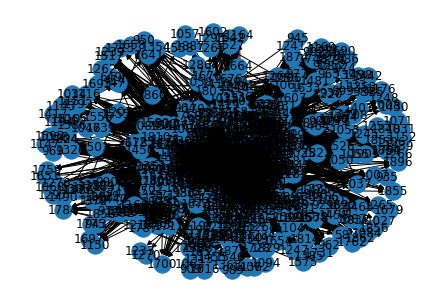

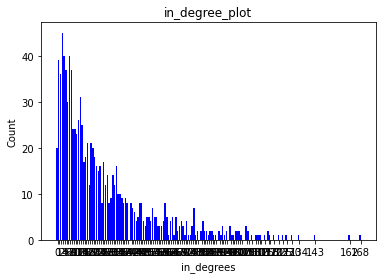

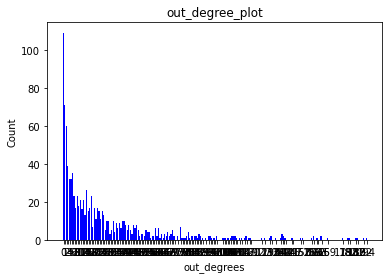

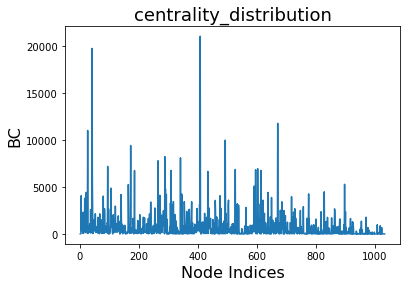

In [17]:
G = nx.read_edgelist('facebook/107.edges')
createGraph(list(G.edges()), None, None, True)

501


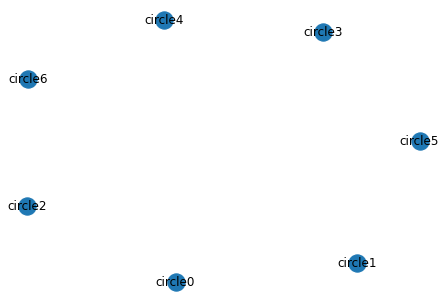

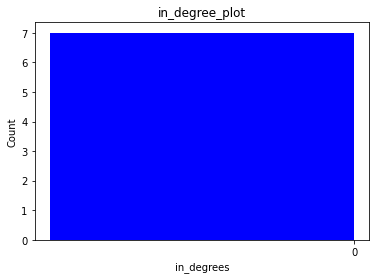

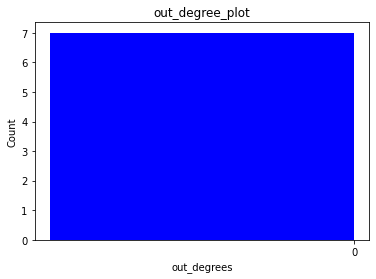

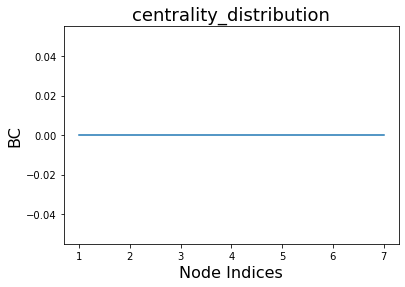

In [42]:
G = nx.read_adjlist('facebook/107.circles')
#subgraph = ['circle0','circle1',"circle2","circle3","circle4","circle5", "circle6"]
createGraph(list(G.edges()), None, subgraph, True)

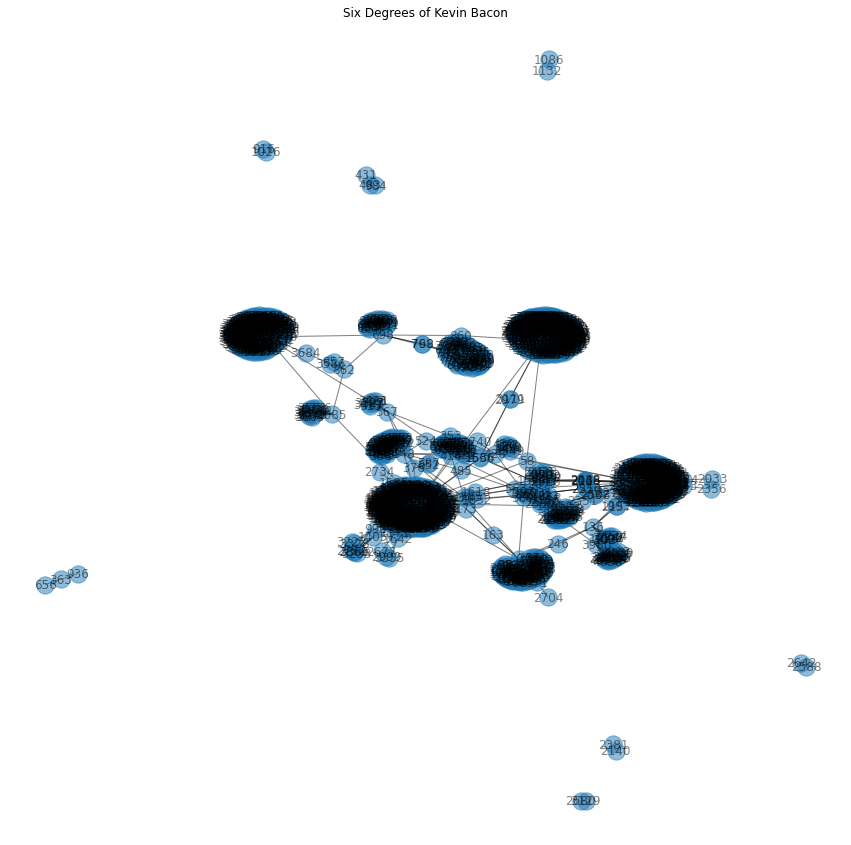

In [41]:
G1 =nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

from random import sample
#random_node = choice(G1.nodes())

G_chart=nx.Graph()
for i in range(1000):
    node1, node2 = sample(G1.nodes(), 2)
    path = nx.shortest_path(G1,source=node1,target=node2)
    nx.add_path(G_chart, path)

fig, ax = plt.subplots(figsize=(15, 15))

# networkx layouts can be really tricky: something you just have to play with
pos = nx.spring_layout(G_chart, scale=0.25)
#pos = nx.circular_layout(G_chart)
labels = {n:n for n in G_chart.nodes()}

plt.title('Six Degrees of Kevin Bacon')
ax.axis('off')
nx.draw_networkx(G_chart, pos,  alpha=0.5, labels=labels, with_labels=True, ax=ax)

